In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [19]:
df = pd.read_csv("./dataset/listings.csv")
df['host_response_rate'] = df['host_response_rate'].str.rstrip('%').astype('float') / 100.0
df['host_acceptance_rate'] = df['host_acceptance_rate'].str.rstrip('%').astype('float') / 100.0

In [20]:
columns = [
    "review_scores_value",
    "number_of_reviews",
    "review_scores_rating",
    "host_response_rate",
    "host_acceptance_rate",
    "review_scores_accuracy",
    "review_scores_cleanliness",
    "review_scores_checkin",
    "host_is_superhost",
   #  "host_since",
]


In [21]:
df = df[columns]

In [22]:
X = df.dropna()

y = X["host_is_superhost"]
y = y.to_numpy()
tf = lambda t: 1 if t == 't' else 0;
y = np.array([tf(xi) for xi in y])

X = X.drop("host_is_superhost", axis=1)

In [23]:
y

array([1, 1, 0, ..., 0, 0, 0])

In [24]:
X

,review_scores_value,number_of_reviews,review_scores_rating,host_response_rate,host_acceptance_rate,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin
0,10.0,227,95.0,1.00,1.00,10.0,10.0,10.0
2,10.0,182,96.0,1.00,1.00,10.0,9.0,10.0
3,9.0,110,94.0,0.50,0.69,9.0,9.0,10.0
5,10.0,289,97.0,1.00,1.00,10.0,10.0,10.0
6,9.0,43,90.0,1.00,0.58,10.0,9.0,10.0
...,...,...,...,...,...,...,...,...
7891,8.0,1,80.0,0.89,0.89,8.0,8.0,10.0
7902,10.0,1,100.0,1.00,1.00,10.0,10.0,10.0
7903,8.0,3,73.0,1.00,1.00,7.0,7.0,8.0
7907,10.0,1,100.0,1.00,1.00,10.0,10.0,10.0


In [25]:
from sklearn.linear_model import LogisticRegression
modelLogReg = LogisticRegression(penalty='l2', solver='lbfgs', C=5, max_iter=1000).fit(X, y)

/Users/ek/.pyenv/versions/3.7.6/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Top left: True Negatives.   
Bottom left: False Negatives   

Top right: False Positives   
Bottom right: True Positives

In [26]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y, modelLogReg.predict(X)))

[[1417  311]
 [ 340  606]]


In [27]:
f = lambda x: 0 if x < 0.5 else 1
baselineYpred = [f(y) for y in np.random.rand(y.shape[0])]
cm = confusion_matrix(y, baselineYpred)
print(cm)

[[845 883]
 [475 471]]


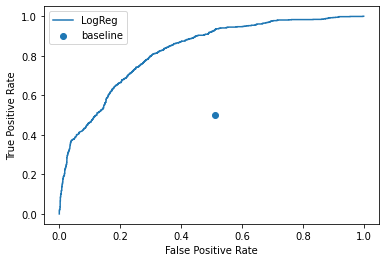

In [28]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y, modelLogReg.decision_function(X))
plt.plot(fpr, tpr, label="LogReg")

fpr = cm[0,1] / (cm[0,0]+ cm[0,1]) # false positive rate = FP/ TN + FP
tpr = cm[1,1] / (cm[1,1]+ cm[1,0]) # true positive rate = TP / TP + FN
plt.scatter(fpr, tpr, label="baseline")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

/Users/ek/.pyenv/versions/3.7.6/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


theta 0 : [0.]
theta 1 : [ 0.00000000e+00 -1.34833873e+00 -3.48405585e-01 -1.07590778e-02
  3.99640948e+00  0.00000000e+00 -2.10097328e+00  0.00000000e+00
  0.00000000e+00 -6.53725325e-02  5.88803384e-03 -3.57251258e-02
  4.81652105e-01  5.94385256e-01  4.05114759e-01  3.18534536e-01
 -2.08101312e-01 -2.95315575e-05  2.54712350e-03  5.35528265e-03
  2.17450755e-02  1.44886923e-02 -1.29406426e-03 -9.31773577e-03
 -6.16093486e-03 -5.60663840e-02  2.66874738e-01  9.66791867e-02
 -2.21323964e-03  5.31536593e-02  6.01420541e+00 -1.53390732e+00
 -1.45686550e+00  0.00000000e+00  7.71442001e-01 -3.93629894e+00
  0.00000000e+00 -8.06067419e-01 -1.57017658e+00 -2.30087598e-01
 -2.86160347e-01 -2.48951133e-01  1.73712642e-01 -2.15119810e-01
  1.52330408e-01]


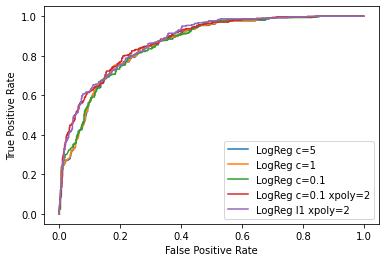

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

X, X_test, y, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

modelLogReg = LogisticRegression(penalty='l2', solver='lbfgs', C=5, max_iter=1000).fit(X, y)
fpr, tpr, _ = roc_curve(y_test, modelLogReg.decision_function(X_test))
plt.plot(fpr, tpr, label="LogReg c=5")

modelLogReg = LogisticRegression(penalty='l2', solver='lbfgs', C=1, max_iter=1000).fit(X, y)
fpr, tpr, _ = roc_curve(y_test, modelLogReg.decision_function(X_test))
plt.plot(fpr, tpr, label="LogReg c=1")

modelLogReg = LogisticRegression(penalty='l2', solver='lbfgs', C=0.1, max_iter=1000).fit(X, y)
fpr, tpr, _ = roc_curve(y_test, modelLogReg.decision_function(X_test))
plt.plot(fpr, tpr, label="LogReg c=0.1")

Xpoly = PolynomialFeatures(2).fit_transform(X)
Xpoly_test = PolynomialFeatures(2).fit_transform(X_test)

modelLogReg = LogisticRegression(penalty='l2', solver='lbfgs', C=0.1, max_iter=1000).fit(Xpoly, y)
fpr, tpr, _ = roc_curve(y_test, modelLogReg.decision_function(Xpoly_test))
plt.plot(fpr, tpr, label="LogReg c=0.1 xpoly=2")

modelLogReg = LogisticRegression(penalty='l1', solver='liblinear', C=4, max_iter=1000).fit(Xpoly, y)
fpr, tpr, _ = roc_curve(y_test, modelLogReg.decision_function(Xpoly_test))
plt.plot(fpr, tpr, label="LogReg l1 xpoly=2")

def printThetas(intercept ,coef):
    print("theta", 0, ":", intercept)
    for i in range(len(coef)):
        print("theta", i+1, ":", coef[i])

printThetas(modelLogReg.intercept_, modelLogReg.coef_)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()

In [30]:
from sklearn.metrics import f1_score
y_pred = modelLogReg.predict(Xpoly_test)
f1_score(y_test,y_pred)

0.6970684039087948